In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import *

# Step1: Understand the data

In [2]:
data=pd.read_csv('/Users/jingyiran/pythonwork/ds for product/homework1/HW1 clv_transactions.csv',header=0)

In [3]:
data.head()

,TransactionID,TransactionDate,CustomerID,Amount
0,1,9/4/2012,1,20.26
1,2,5/15/2012,2,10.87
2,3,5/23/2014,2,2.21
3,4,10/24/2014,2,10.48
4,5,10/13/2012,2,3.94


In [4]:
data.describe()

,TransactionID,CustomerID,Amount
count,4186.000000,4186.000000,4186.000000
mean,2093.500000,516.165791,9.028082
std,1208.538442,291.465283,38.723909
min,1.000000,1.000000,-1.000000
25%,1047.250000,270.000000,3.310000
50%,2093.500000,522.000000,6.885000
75%,3139.750000,762.750000,11.690000
max,4186.000000,1000.000000,2033.000000


## 1. Are there any missing values ?

In [5]:
data.isnull().any().any()

False

## 2. What's the range of dates?

In [6]:
# Lower Bound
data['TransactionDate'].min()

'1/1/2011'

In [7]:
# Upper Bound
data['TransactionDate'].max()

'9/9/2015'

## 3. How many unique customers?

In [8]:
data.groupby(['CustomerID']).count()

,TransactionID,TransactionDate,Amount
CustomerID,,,
1,1,1,1
2,8,8,8
3,7,7,7
4,1,1,1
5,2,2,2
...,...,...,...
996,2,2,2
997,2,2,2
998,8,8,8


#### There are 1000 rows in total, thus there are 1000 unique customers

## 4. Explore the Amount field

In [9]:
# min 
print('Minimum value of the amount: '+str(data['Amount'].min()))
# max
print('Maximum value of the amount: '+str(data['Amount'].max()))
# mean
print('Mean value of the amount: '+str(data['Amount'].mean()))
# variance
print('Variance of the amount: '+str(data['Amount'].var()))
# std
print('Standard deviation of the amount: '+str(data['Amount'].std()))

Minimum value of the amount: -1.0
Maximum value of the amount: 2033.0
Mean value of the amount: 9.028081700907789
Variance of the amount: 1499.5411107517464
Standard deviation of the amount: 38.72390877418945


#### From the result, we can get that the minimum value must be a mistake because the amount cannot be less than 0; the maximum value might be an outlier because it's more than 3 std away from the mean

## 5. Do transaction amounts in general increase over time?

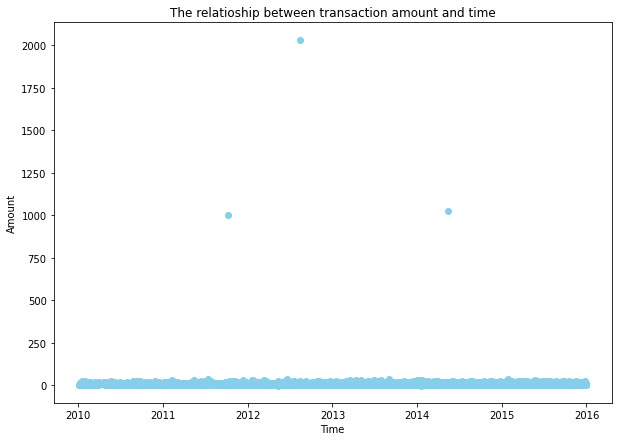

In [10]:
# Generate the scatter plot: the y-axis is the amout and x-axis is the transaction dates
plt.figure(figsize=(10,7))
plt.scatter(pd.to_datetime(data['TransactionDate']),data['Amount'],color = "skyblue")
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('The relatioship between transaction amount and time')
plt.show()

#### From the result, we can see there are 3 outliers. To get a better trend, we choose to delete them and then plot again

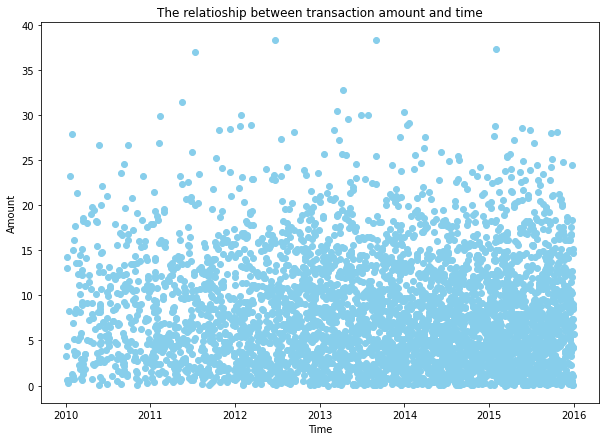

In [11]:
data1=data[data['Amount']<500]
data1=data1[data1['Amount']>0]
plt.figure(figsize=(10,7))
plt.scatter(pd.to_datetime(data1['TransactionDate']),data1['Amount'],color = "skyblue")
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('The relatioship between transaction amount and time')
plt.show()

#### From the plot, we cannot see the upwarding trend, and we cannot conclude the transaction amounts increased over time. To make the plot simpler, we choose to set the x-axis as year

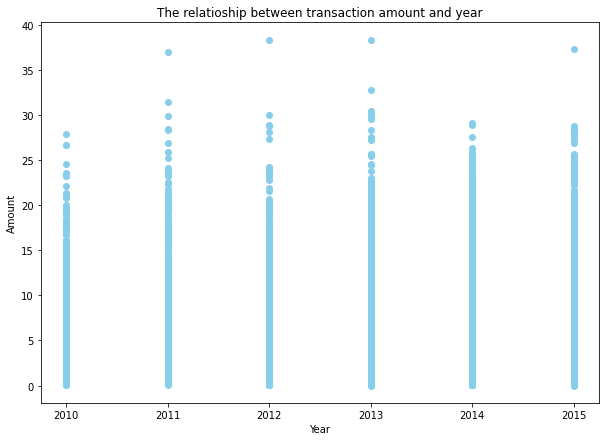

In [12]:
# Generate the scatter plot: the y-axis is the amout and x-axis is the transaction year
plt.figure(figsize=(10,7))
plt.scatter(pd.to_datetime(data1['TransactionDate']).dt.year,data1['Amount'],color = "skyblue")
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('The relatioship between transaction amount and year')
plt.show()

#### The concusion is the same as the former plot: we cannot conclude the transaction amounts increased over time

# Step2: Explore the dataset

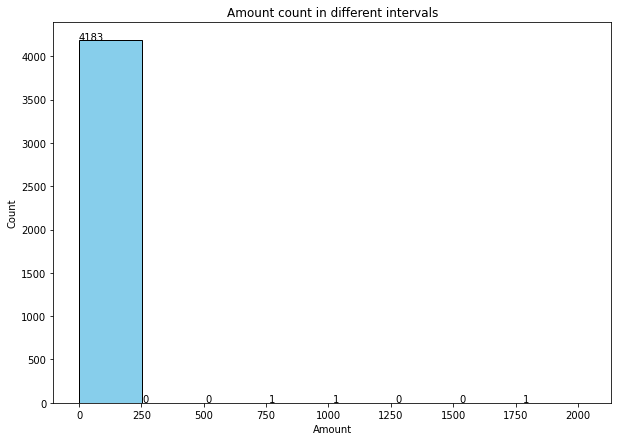

In [13]:
# plot the histogram to see if there is any outlier
plt.figure(figsize=(10,7))
bins=8
nums,bins,patches=plt.hist(data['Amount'], color = "skyblue",edgecolor='black',bins=bins)
for num,bin in zip(nums,bins):
    plt.annotate(int(num),xy=(bin,num),xytext=(bin,num+4)) 
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Amount count in different intervals')
plt.show()

#### From the result we can get that there are 3 outliers in Amont column, one is in [750-1000], one is in [1000,1250] and one is in[1750,2000]. Since there are more than 4000 observations and only 3 outliers, just delete them

In [14]:
data=data[data['Amount']<500]

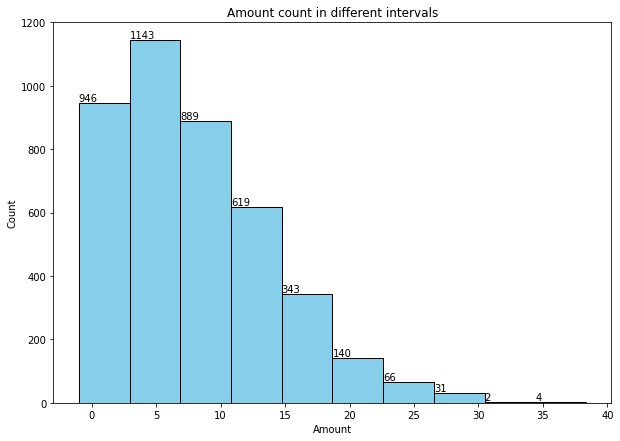

In [15]:
# Plot the histogram again to see the result
plt.figure(figsize=(10,7))
bins=10
nums,bins,patches=plt.hist(data['Amount'], color = "skyblue",edgecolor='black',bins=bins)
for num,bin in zip(nums,bins):
    plt.annotate(int(num),xy=(bin,num),xytext=(bin,num+6)) 
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Amount count in different intervals')
plt.show()

# Step 3: Determine origin year of customers

In [16]:
# Add a new colum 'earlist_year', which shows the year each customer firstly made the transaction
data['TransactionDate']=pd.to_datetime(data['TransactionDate'])
Date_table=data.groupby(['CustomerID'])['TransactionDate'].min().reset_index()   
Date_table['earlist_year']=Date_table['TransactionDate'].dt.year
del(Date_table['TransactionDate'])
data_new=pd.merge(data,Date_table,on='CustomerID')
data_new

,TransactionID,TransactionDate,CustomerID,Amount,earlist_year
0,1,2012-09-04,1,20.26,2012
1,2,2012-05-15,2,10.87,2012
2,3,2014-05-23,2,2.21,2012
3,4,2014-10-24,2,10.48,2012
4,5,2012-10-13,2,3.94,2012
...,...,...,...,...,...
4178,4182,2013-06-23,1000,3.86,2010
4179,4183,2011-08-07,1000,4.00,2010
4180,4184,2012-10-07,1000,18.37,2010
4181,4185,2014-01-09,1000,3.45,2010


# Step4: Calculate cumulative transaction amounts

In [17]:
# Add a new colum 'earlist_date', which is the first day of the 'earlist_year'
# Add a new colum 'interval', which is the difference in year between TransactionDate and earlist_date
new_date=[]
for i in data_new['earlist_year']:
    new_date.append(date(i,1,1))
data_new['earlist_date']=pd.to_datetime(pd.Series(new_date))
data_new['interval']=(data_new['TransactionDate']-data_new['earlist_date']).astype('timedelta64[D]')/365

In [18]:
# Add a new colum 'interval_int', which upper round the interval
data_new['interval_int']=data_new['interval'].astype(int)+1

In [19]:
# Add a new colum 'interval_final', which mutiply interval_int by 12
data_new['interval_final']=data_new['interval_int']*12

In [20]:
# To do the cumulative sum calculation: apply groupby to group the data by 'earlist_year' and 'interval_final'
data_new1=data_new[['earlist_year','Amount','interval_final']]
data_new2=data_new1.groupby(['earlist_year', 'interval_final']).sum()
data_new3=data_new1.groupby(['earlist_year', 'interval_final']).sum().groupby(['earlist_year']).cumsum().reset_index()
data_new3

,earlist_year,interval_final,Amount
0,2010,12,2259.67
1,2010,24,3614.78
2,2010,36,5274.81
3,2010,48,6624.83
4,2010,60,7930.69
5,2010,72,8964.49
6,2011,12,2238.46
7,2011,24,3745.82
8,2011,36,5434.68
9,2011,48,6702.11


In [21]:
# Index the dataframe to get the data at each interval
# Here is a sample for interval_fianl=12

In [22]:
df_12=data_new3['interval_final'].where(data_new3['interval_final']==12).dropna()
list_12=pd.DataFrame(df_12).index.tolist()
df_12=data_new3.iloc[list_12,:]
df_12.columns=['Origin','interval_final','12']
df_12

,Origin,interval_final,12
0,2010,12,2259.67
6,2011,12,2238.46
11,2012,12,2181.35
15,2013,12,2179.85
18,2014,12,1830.85
20,2015,12,1912.17


In [23]:
# Do the rest of the index for interval_final=24,36,48,60,72 respectively

In [24]:
df_24=data_new3['interval_final'].where(data_new3['interval_final']==24).dropna()
list_24=pd.DataFrame(df_24).index.tolist()
df_24=data_new3.iloc[list_24,:]
df_24.columns=['Origin','interval_final','24']

In [25]:
df_36=data_new3['interval_final'].where(data_new3['interval_final']==36).dropna()
list_36=pd.DataFrame(df_36).index.tolist()
df_36=data_new3.iloc[list_36,:]
df_36.columns=['Origin','interval_final','36']

In [26]:
df_48=data_new3['interval_final'].where(data_new3['interval_final']==48).dropna()
list_48=pd.DataFrame(df_48).index.tolist()
df_48=data_new3.iloc[list_48,:]
df_48.columns=['Origin','interval_final','48']

In [27]:
df_60=data_new3['interval_final'].where(data_new3['interval_final']==60).dropna()
list_60=pd.DataFrame(df_60).index.tolist()
df_60=data_new3.iloc[list_60,:]
df_60.columns=['Origin','interval_final','60']

In [28]:
df_72=data_new3['interval_final'].where(data_new3['interval_final']==72).dropna()
list_72=pd.DataFrame(df_72).index.tolist()
df_72=data_new3.iloc[list_72,:]
df_72.columns=['Origin','interval_final','72']

In [29]:
# concat important columns to generate the result matrix
result1 =pd.merge(df_12[['Origin','12']],df_24[['Origin','24']],how='outer')
result2 =pd.merge(result1,df_36[['Origin','36']],how='outer')
result3 =pd.merge(result2,df_48[['Origin','48']],how='outer')
result4 =pd.merge(result3,df_60[['Origin','60']],how='outer')
result5 =pd.merge(result4,df_72[['Origin','72']],how='outer')

In [30]:
new_origin=[]
for i in result5['Origin']:
    new_origin.append(str(i)+'-01-01 - '+str(i)+' -12-31')
result5['Origin']=pd.Series(new_origin)
result5

,Origin,12,24,36,48,60,72
0,2010-01-01 - 2010 -12-31,2259.67,3614.78,5274.81,6624.83,7930.69,8964.49
1,2011-01-01 - 2011 -12-31,2238.46,3745.82,5434.68,6702.11,7861.24,NaN
2,2012-01-01 - 2012 -12-31,2181.35,3874.69,5226.86,6501.85,NaN,NaN
3,2013-01-01 - 2013 -12-31,2179.85,3608.81,5226.75,NaN,NaN,NaN
4,2014-01-01 - 2014 -12-31,1830.85,3262.05,NaN,NaN,NaN,NaN
5,2015-01-01 - 2015 -12-31,1912.17,NaN,NaN,NaN,NaN,NaN


# Step 5: Calculate new customers

In [31]:
# Calculate new customers in each year
df_count=data_new.groupby(['earlist_year'])['CustomerID'].nunique()
df_count

earlist_year
2010    172
2011    170
2012    163
2013    180
2014    155
2015    160
Name: CustomerID, dtype: int64

In [32]:
# Inner join the df_count with data_new3 and reset the index name
df_count_merge=pd.merge(data_new3,df_count,on='earlist_year')
df_count_merge.rename(columns={'CustomerID':'new_user'})

,earlist_year,interval_final,Amount,new_user
0,2010,12,2259.67,172
1,2010,24,3614.78,172
2,2010,36,5274.81,172
3,2010,48,6624.83,172
4,2010,60,7930.69,172
5,2010,72,8964.49,172
6,2011,12,2238.46,170
7,2011,24,3745.82,170
8,2011,36,5434.68,170
9,2011,48,6702.11,170


In [33]:
# Code to the the derised result with 6 rows and 6 columns

In [34]:
df12_count=df_count_merge['interval_final'].where(df_count_merge['interval_final']==12).dropna()
list_12_count=pd.DataFrame(df12_count).index.tolist()
df12_count=df_count_merge.iloc[list_12_count,:]
df12_count.columns=['Origin','interval_final','Amount','12']

In [35]:
df24_count=df_count_merge['interval_final'].where(df_count_merge['interval_final']==24).dropna()
list_24_count=pd.DataFrame(df24_count).index.tolist()
df24_count=df_count_merge.iloc[list_24_count,:]
df24_count.columns=['Origin','interval_final','Amount','24']

In [36]:
df36_count=df_count_merge['interval_final'].where(df_count_merge['interval_final']==36).dropna()
list_36_count=pd.DataFrame(df36_count).index.tolist()
df36_count=df_count_merge.iloc[list_36_count,:]
df36_count.columns=['Origin','interval_final','Amount','36']

In [37]:
df48_count=df_count_merge['interval_final'].where(df_count_merge['interval_final']==48).dropna()
list_48_count=pd.DataFrame(df48_count).index.tolist()
df48_count=df_count_merge.iloc[list_48_count,:]
df48_count.columns=['Origin','interval_final','Amount','48']

In [38]:
df60_count=df_count_merge['interval_final'].where(df_count_merge['interval_final']==60).dropna()
list_60_count=pd.DataFrame(df60_count).index.tolist()
df60_count=df_count_merge.iloc[list_60_count,:]
df60_count.columns=['Origin','interval_final','Amount','60']

In [39]:
df72_count=df_count_merge['interval_final'].where(df_count_merge['interval_final']==72).dropna()
list_72_count=pd.DataFrame(df72_count).index.tolist()
df72_count=df_count_merge.iloc[list_72_count,:]
df72_count.columns=['Origin','interval_final','Amount','72']

In [40]:
result1_count =pd.merge(df12_count[['Origin','12']],df24_count[['Origin','24']],how='outer')
result2_count =pd.merge(result1_count,df36_count[['Origin','36']],how='outer')
result3_count =pd.merge(result2_count,df48_count[['Origin','48']],how='outer')
result4_count =pd.merge(result3_count,df60_count[['Origin','60']],how='outer')
result5_count =pd.merge(result4_count,df72_count[['Origin','72']],how='outer')

In [41]:
new_origin_count=[]
for i in result5_count['Origin']:
    new_origin_count.append(str(i)+'-01-01 - '+str(i)+' -12-31')
result5_count['Origin']=pd.Series(new_origin_count)
result5_count

,Origin,12,24,36,48,60,72
0,2010-01-01 - 2010 -12-31,172,172.0,172.0,172.0,172.0,172.0
1,2011-01-01 - 2011 -12-31,170,170.0,170.0,170.0,170.0,NaN
2,2012-01-01 - 2012 -12-31,163,163.0,163.0,163.0,NaN,NaN
3,2013-01-01 - 2013 -12-31,180,180.0,180.0,NaN,NaN,NaN
4,2014-01-01 - 2014 -12-31,155,155.0,NaN,NaN,NaN,NaN
5,2015-01-01 - 2015 -12-31,160,NaN,NaN,NaN,NaN,NaN


# Step 6: Historic CLV

In [42]:
# Divide two DataFrame to get the final result
final_result=result5.iloc[:,1:]/result5_count.iloc[:,1:]
final_result=pd.concat([result5[['Origin']],final_result],axis=1)
final_result=final_result.round(2)
final_result

,Origin,12,24,36,48,60,72
0,2010-01-01 - 2010 -12-31,13.14,21.02,30.67,38.52,46.11,52.12
1,2011-01-01 - 2011 -12-31,13.17,22.03,31.97,39.42,46.24,NaN
2,2012-01-01 - 2012 -12-31,13.38,23.77,32.07,39.89,NaN,NaN
3,2013-01-01 - 2013 -12-31,12.11,20.05,29.04,NaN,NaN,NaN
4,2014-01-01 - 2014 -12-31,11.81,21.05,NaN,NaN,NaN,NaN
5,2015-01-01 - 2015 -12-31,11.95,NaN,NaN,NaN,NaN,NaN


In [43]:
final_result.set_index(final_result["Origin"], inplace=True)
del(final_result['Origin'])
plot_result=final_result.T
plt.style.use('ggplot')

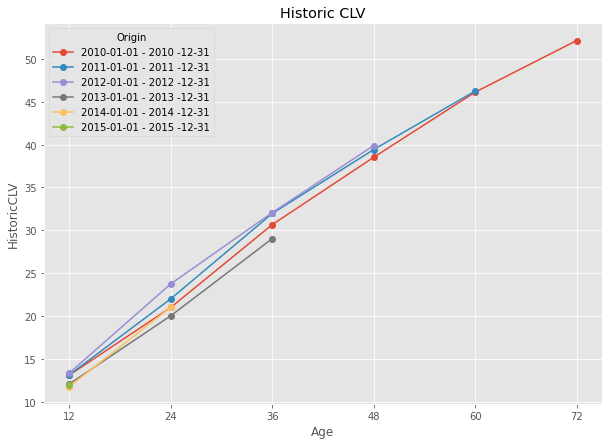

In [44]:
# Plot the results for each year on the same graph
plot_result.plot(figsize=(10,7),marker='o')
plt.grid(color='white')
plt.xlabel('Age')
plt.ylabel('HistoricCLV')
plt.title('Historic CLV')
plt.show()

In [45]:
# Combine all data to create a single curve (weighted by the number of customers in each group)
historic_dic={'Age':[12,24,36,48,60,72],
             'HistoricCLV':[final_result['12'].mean(),final_result['24'].mean(),final_result['36'].mean(),
                    final_result['48'].mean(),final_result['60'].mean(),final_result['72'].mean()]}
historic_clv=pd.DataFrame(historic_dic).round(2)
historic_clv

,Age,HistoricCLV
0,12,12.59
1,24,21.58
2,36,30.94
3,48,39.28
4,60,46.18
5,72,52.12


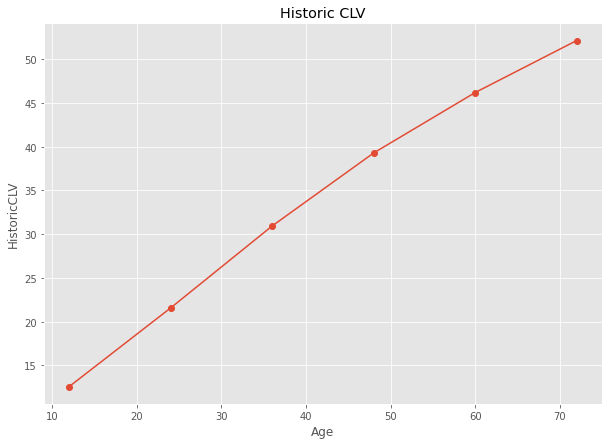

In [46]:
# Plot the result
plt.figure(figsize=(10,7))
plt.plot(historic_clv['Age'],historic_clv['HistoricCLV'],marker='o')
plt.grid(color='white')
plt.xlabel('Age')
plt.ylabel('HistoricCLV')
plt.title('Historic CLV')
plt.show()

# Step 7: Interpreting the results

### Interpretation: 
The historic CLV shows the average cumulative transaction amount per customer over time. From the plot we can get that the existing customers are valuable because they are willing to make transactions after they purchased at the first time. 

### Question 1: How much have customers acquired in 2011 spent to date?
Their cumulative transaction amount is 8964.49 dolloars. On average, their transaction amount is 52.12 dollars per person from 2011 to date. 

### Question 2: Do each group of customers exhibit similar or different patterns of spending?
Overall, customers in each group exhibit similar patterns of spending, however, there is still some slight difference. For instance, within a short period (12 months, 24 months or 36 months after), customers in each group shows different transaction pattern, but with time goes on, the difference becomes smaller and smaller, which indicates that it's important for companies to convert new customers to existing customers after new customers made the first transaction. 